<a href="https://colab.research.google.com/github/Gajanan-Sapsod/Image_Colorization/blob/main/MNIST_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
train=datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test=datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))


In [7]:
trainset=torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset=torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [8]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [9]:
print(data[0][0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [18]:
print(data[1][7])

tensor(5)


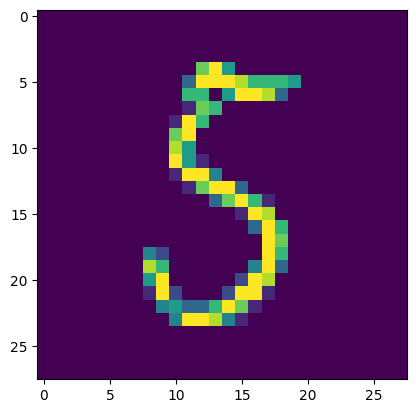

In [16]:
#viz
import matplotlib.pyplot as plt
plt.imshow(data[0][7].view([28, 28]))
plt.show()

In [41]:
class net(nn.Module):
  def __init__(self):
    super(net, self).__init__()
    self.fc1=nn.Linear(28*28, 128)
    self.fc2=nn.Linear(128, 128)
    self.fc3=nn.Linear(128, 128)
    self.fc4=nn.Linear(128, 10)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=F.relu(self.fc4(x))
    return F.log_softmax(x, dim=1)


In [35]:
Net=net()

In [42]:
optimiser=optim.Adam(Net.parameters(), lr=0.001)

In [43]:
epochs=10
for epoch in range(epochs):
  for data in trainset:
    x,y=data
    Net.zero_grad()
    output=Net(x.view([-1, 28*28]))
    loss=F.nll_loss(output, y)
    loss.backward()
    optimiser.step()
  print(loss)



tensor(0.7612, grad_fn=<NllLossBackward0>)
tensor(0.6913, grad_fn=<NllLossBackward0>)
tensor(0.2804, grad_fn=<NllLossBackward0>)
tensor(0.4608, grad_fn=<NllLossBackward0>)
tensor(0.2718, grad_fn=<NllLossBackward0>)
tensor(0.6921, grad_fn=<NllLossBackward0>)
tensor(0.9726, grad_fn=<NllLossBackward0>)
tensor(0.9210, grad_fn=<NllLossBackward0>)
tensor(0.9212, grad_fn=<NllLossBackward0>)
tensor(0.4633, grad_fn=<NllLossBackward0>)


tensor(8)
tensor(8)


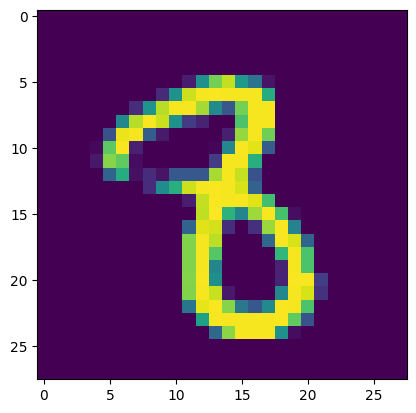

In [60]:
output=Net(data[0][5].view([-1,28*28]))
print(torch.argmax(output))
print((data[1][5]))
plt.imshow(data[0][5].view([28, 28]))
plt.show()

In [44]:
correct=0
total=0
with torch.no_grad():
  for data in trainset:
    x,y=data
    output=Net(x.view([-1, 28*28]))
    for idx, i in enumerate(output):
      if(torch.argmax(i)==y[idx]):
        correct+=1
      total+=1
print(correct*100/total)

69.47833333333334


In [45]:
correct=0
total=0
with torch.no_grad():
  for data in testset:
    x,y=data
    output=Net(x.view([-1, 28*28]))
    for idx, i in enumerate(output):
      if(torch.argmax(i)==y[idx]):
        correct+=1
      total+=1
print(correct*100/total)

68.69
